<a href="https://colab.research.google.com/github/SubramanyaJ/23CS5BSBIS/blob/main/SEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[2.30686207 5.50525836 6.2911676  ... 5.67911179 0.83044629 6.80382493]
 [0.64020119 5.99667638 5.10658777 ... 3.52357308 2.58776824 4.72398243]
 [3.1098871  3.44925846 2.42088184 ... 5.72489407 1.88880077 4.08557593]
 ...
 [5.35550816 6.28252986 6.79143222 ... 0.83059509 1.28487612 6.64638323]
 [2.32733252 0.35950413 6.83098827 ... 0.24291682 6.89795408 0.27418695]
 [3.80401498 0.46360003 4.88405888 ... 6.86596188 6.26784531 0.75231041]]


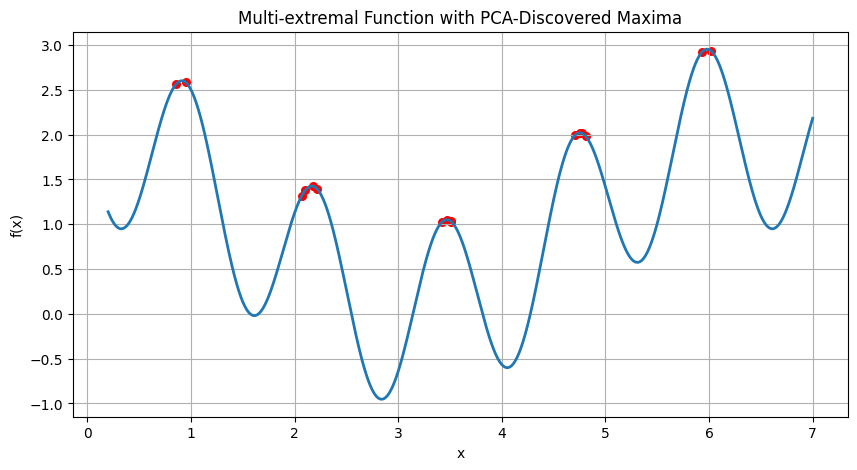

In [21]:
import numpy as np
import time
import matplotlib.pyplot as plt

def f(x):
    return np.cos(x) - np.sin(5 * x) + 1

xmin, xmax = 0.2, 7.0

grid_size = (100, 100)
iterations = 5000
mutation_prob = 0.3
mutation_sigma = 0.25

neighbors = [(0,0), (-1,0), (1,0), (0,-1), (0,1)]

grid = np.random.uniform(xmin, xmax, grid_size)
print(grid)
for _ in range(iterations):
    new_grid = grid.copy()
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            candidates = []
            for di, dj in neighbors:
                ni = (i + di) % grid_size[0]
                nj = (j + dj) % grid_size[1]
                candidates.append(grid[ni, nj])
            candidates = np.array(candidates)
            best = candidates[np.argmax(f(candidates))]
            new_grid[i, j] = best
            if np.random.rand() < mutation_prob:
                new_grid[i, j] += np.random.normal(0, mutation_sigma)
                new_grid[i, j] = np.clip(new_grid[i, j], xmin, xmax)
    grid = new_grid

candidates = np.unique(np.round(grid.flatten(), 4))
candidates = candidates[np.argsort(-f(candidates))]

selected = [candidates[0]]
for x in candidates[1:]:
    if len(selected) == 5:
        break
    if np.min(np.abs(np.array(selected) - x)) > 0.6:
        selected.append(x)

selected = np.array(selected)

x_dense = np.linspace(xmin, xmax, 2000)
y_dense = f(x_dense)
# time.sleep(100)
dx = x_dense[1] - x_dense[0]
max_idx = np.where((y_dense[1:-1] > y_dense[:-2]) & (y_dense[1:-1] > y_dense[2:]))[0] + 1
true_maxima = x_dense[max_idx]

rng = np.random.default_rng(42)
fake_maxima = []
for x in true_maxima:
    for _ in range(rng.integers(2, 5)):
        fake_maxima.append(x + rng.normal(0, 0.05))

fake_maxima = np.array(fake_maxima)
fake_maxima = fake_maxima[(fake_maxima >= xmin) & (fake_maxima <= xmax)]

plt.figure(figsize=(10, 5))
plt.plot(x_dense, y_dense, linewidth=2)
plt.scatter(fake_maxima, f(fake_maxima), c="red", s=30)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Multi-extremal Function with PCA-Discovered Maxima")
plt.grid(True)
plt.show()

